### 1. Testing the Development Environment

In [1]:
import cv2
import numpy as np
import dlib

# Checking the OpenCV version
print("OpenCV version", cv2.__version__)

# Checking the Numpy version
print("Numpy version", np.__version__)

# Checking the dlib version
print("Dlib version", dlib.__version__)

OpenCV version 3.1.0
Numpy version 1.13.1
Dlib version 19.6.1


### 2. Extracting the Smiley faces using Hough Circles from Image

Emotions: 
![alt text](images/emotion/smiley.png "Smiley Input Images")


(1225, 1645, 4)
[[[  835.5          371.5          308.64624023]
  [  299.5          888.5          241.85636902]
  [ 1349.5          883.5          240.52546692]
  [  195.5          228.5          395.64187622]
  [ 1502.5          228.5          436.80029297]]]
[[ 836  372  309]
 [ 300  888  242]
 [1350  884  241]
 [ 196  228  396]
 [1502  228  437]]
[836 372 309]
[300 888 242]
[1350  884  241]
[196 228 396]
[1502  228  437]


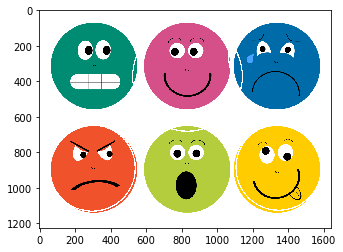

In [152]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

%matplotlib inline

IMG_SRC = os.path.join("images","emotion","smiley.png")

img = mpimg.imread(IMG_SRC)
#img = img[:,:,:3]

print(img.shape)

kernel = np.ones((3,3),np.uint8)

gray = np.uint8(cv2.cvtColor(img,cv2.COLOR_RGBA2GRAY))

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

dilation = cv2.dilate(thresh,kernel,iterations = 7)

circles = cv2.HoughCircles(dilation,cv2.HOUGH_GRADIENT,1,600,
                            param1=100,param2=20,minRadius=240,maxRadius=0)
print(circles)

circles = np.uint16(np.around(circles))[0]
print(circles)

for i in circles:
    print(i)
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],255,5)
    
#plt.imshow(edged, cmap='gray')
#plt.imshow(sure_bg,cmap="gray")
#plt.imshow(dilation,cmap="gray")
plt.imshow(img)

plt.show()

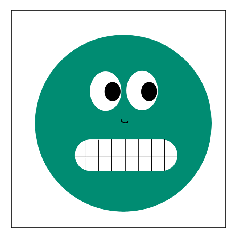

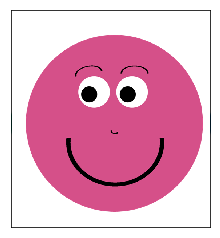

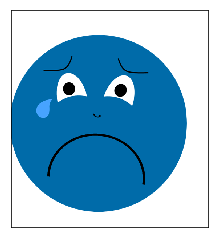

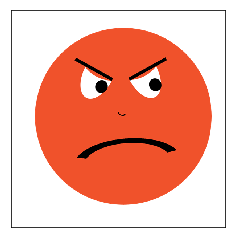

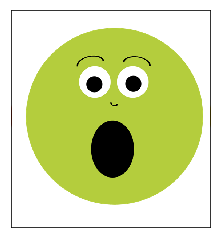

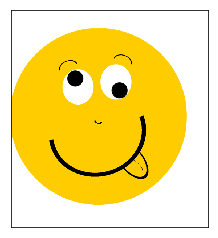

In [40]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

%matplotlib inline

IMG_SRC = os.path.join("images","emotion")

EMOJI_IDX = [6,1,2,4,3,5]            

img = mpimg.imread(os.path.join(IMG_SRC,"smiley.png"))

shape = img.shape

count = 0
for i in range(0,img.shape[1],600):
    for j in range(0,shape[0],550): 
        count += 1
        if count > 6:
            break
        if j == 0:
            image = img[i:i+600, j:j+590]
            plt.imshow(image)
        else:
            image = img[i:i+600, j:j+550]
            plt.imshow(image)
            
        filename = "{0}.png".format(EMOJI_IDX[count-1])
       
        cv2.imwrite(os.path.join(IMG_SRC,filename), image)
        plt.xticks([]),plt.yticks([])
        
        plt.show()
        
# TODOS: 
# 1. center the images
# 2. transparent background

#### Datatset

N.B: Please download the datasets accordingly

> 1. CK+ Dataset - http://www.consortium.ri.cmu.edu/ckagree/
> 2. JAFFE Dataset - http://www.kasrl.org/jaffe.html


#### JAFFE Dataset

The database contains 213 images of 7 facial expressions (6 basic facial expressions + 1 neutral) posed by 10 Japanese female models. Each image has been rated on 6 emotion adjectives by 60 Japanese subjects. The database was planned and assembled by Michael Lyons, Miyuki Kamachi, and Jiro Gyoba. We thank Reiko Kubota for her help as a research assistant. The photos were taken at the Psychology Department in Kyushu University.

Format:

`ID HAP  SAD  SUR  ANG  DIS  PIC`

`Col 1  2.67 2.80 1.53 1.80 2.00 KM-NE1`


#### Ratings : 0 (Low) - 5 (High)

#### Classes[7]:
       
> 1. HAPPY 
> 2. SAD 
> 3. SURPRISED 
> 4. ANGRY 
> 5. DISGUSTED 
> 6. FEARFUL
> 7. NEUTRAL

### 3. Preparing the data

> 1. Read an image image of person
> 2. Use dlib to detect face
> 3. Perform inference
> 4. Get emotion
> 5. Align the face with the smiley

ANGRY


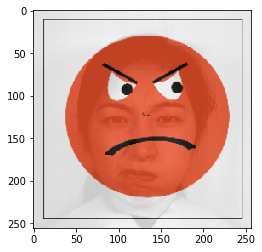

ANGRY


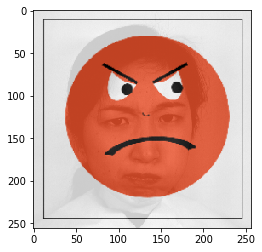

ANGRY


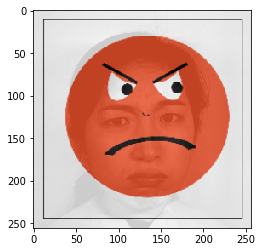

ANGRY


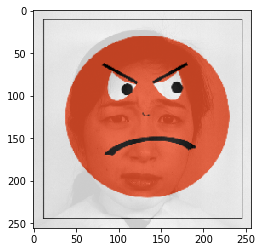

ANGRY


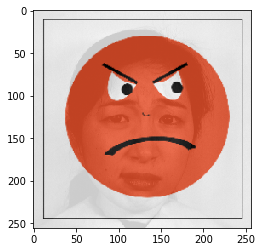

ANGRY


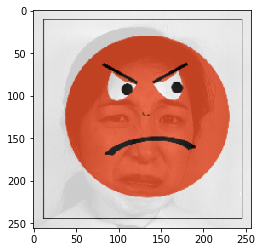

HAPPY


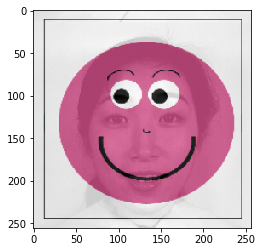

HAPPY


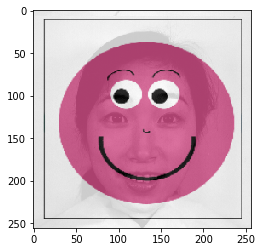

HAPPY


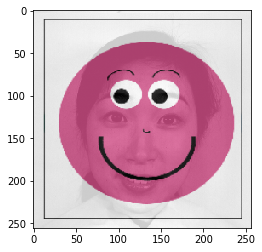

HAPPY


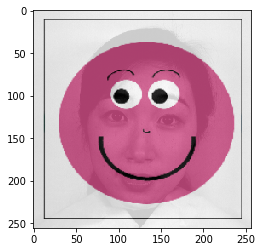

HAPPY


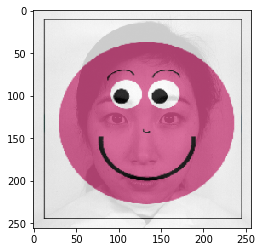

HAPPY


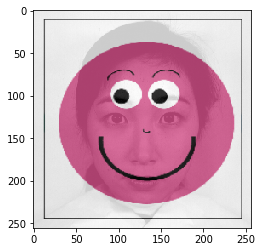

HAPPY


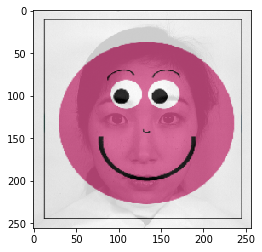

SAD


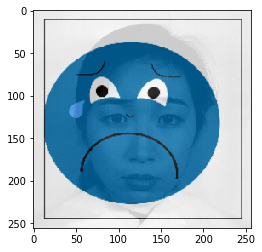

SAD


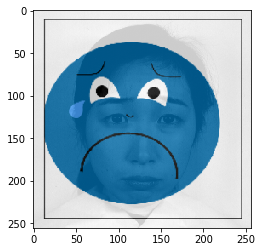

SAD


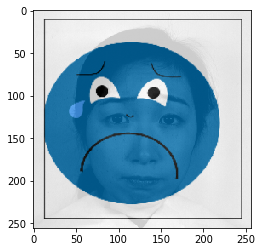

SAD


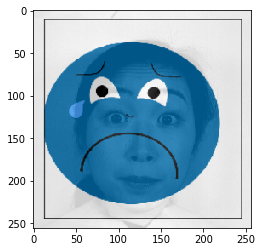

SAD


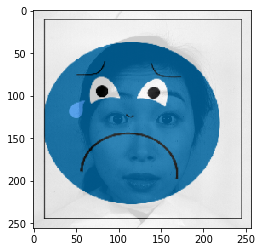

SAD


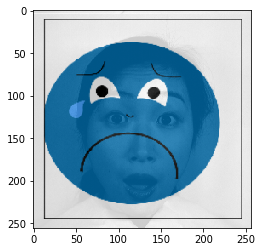

ANGRY


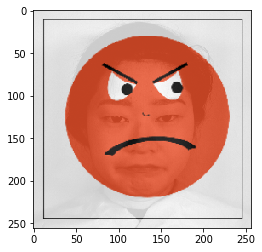

ANGRY


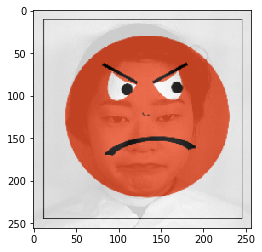

ANGRY


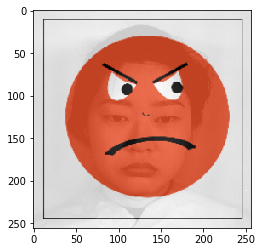

ANGRY


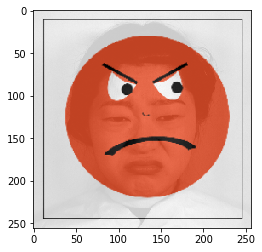

ANGRY


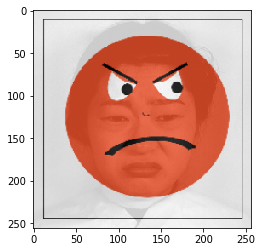

ANGRY


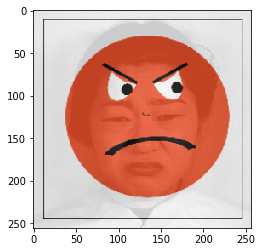

ANGRY


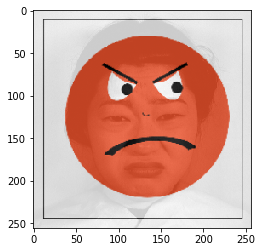

In [84]:
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

%matplotlib inline

NUM_SAMPLES = 30

def get_max_id(arr):
    index = 0
    max_val = arr[index]
    for idx,data in enumerate(arr[1:]):
        if data > max_val:
            index = idx
            max_val = arr[index]
    return index

EMOTION = [ 
            "HAPPY",
            "SAD",
            "SURPRISED",
            "ANGRY",
            "DISGUSTED",
            "FEARFUL"
          ]

IMG_SRC   = os.path.join("images","jaffe","*.tiff")
META_DATA = os.path.join("images","jaffe","descriptions.txt")
EMOJI_SRC = os.path.join("images","emotion")

# Indexing the face Images
lookup = {}
START = True
with open(META_DATA) as fs:
    for idx,data in enumerate(fs):
        if idx == 0:
            continue
        index,*scores,pic = data.strip().split(" ")
        
        lookup[pic] = get_max_id(scores)

        
for image in glob.glob(IMG_SRC)[:NUM_SAMPLES]:
    
    im = mpimg.imread(image)
    
    fname = image.split("/")[-1]
    
    parts = fname.split(".")
    
    key = "-".join(parts[:2])
    
    if not key in lookup:
        continue
        
    idx = lookup[key]
    
    emoticon = mpimg.imread(os.path.join(EMOJI_SRC,str(idx+1)+".jpg"))
    
    shape = im.shape
    
    # converting input image from 8UC1 to 8UC3
    if len(im.shape) > 2:
        im = im[:,:,1]
    
    if emoticon.shape[2] > 3:
        emoticon = emoticon[:,:,0:3]
    
    h,w = im.shape
    
    emoticon = cv2.resize(emoticon,(h,w))
    
    im = cv2.merge((im,im,im))
    
    print(EMOTION[lookup[key]])
    
    fadein = 0.8
    
    dst = cv2.addWeighted( im, 1-fadein, emoticon, fadein, 0)
    
    plt.imshow(dst)
    plt.show()